In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
import os
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit

In [73]:
dados = pd.read_csv("dados/dados_imperfeito.csv")
del dados['Unnamed: 0']
dados

,comprimento de onda,cor
0,470.00,azul
1,467.65,azul
2,470.31,azul
3,474.96,azul
4,470.61,azul
...,...,...
195,598.39,verde
196,602.04,verde
197,596.69,verde
198,600.35,verde


In [74]:
# Cria a camada de normalização
normalization_layer = keras.layers.Normalization(axis=-1)

# Adapta a camada aos dados (necessário para calcular a média e o desvio padrão)
normalization_layer.adapt(dados['comprimento de onda'].values.reshape(-1, 1))

In [75]:
encoder = OneHotEncoder()
cor_encoded = encoder.fit_transform(dados['cor'].values.reshape(-1,1))
cor_encoded.toarray()

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [76]:
dados['cor encoded'] = cor_encoded.toarray()[:,0].copy()
dados

,comprimento de onda,cor,cor encoded
0,470.00,azul,1.0
1,467.65,azul,1.0
2,470.31,azul,1.0
3,474.96,azul,1.0
4,470.61,azul,1.0
...,...,...,...
195,598.39,verde,0.0
196,602.04,verde,0.0
197,596.69,verde,0.0
198,600.35,verde,0.0


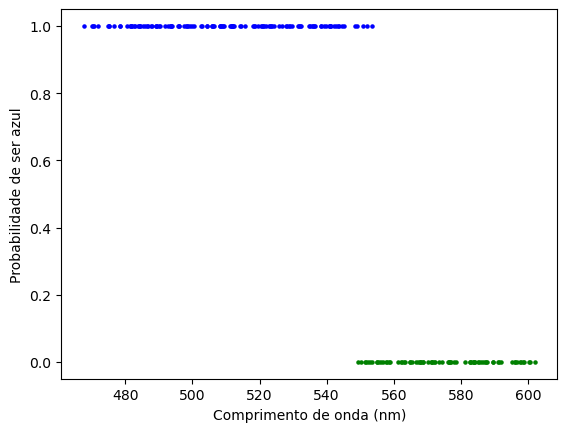

In [77]:
azul = dados[dados['cor']=='azul']
verde = dados[dados['cor']=='verde']

plt.scatter(azul['comprimento de onda'],azul['cor encoded'],color='blue',s=5)
plt.scatter(verde['comprimento de onda'],verde['cor encoded'],color='green',s=5)
plt.ylabel('Probabilidade de ser azul')
plt.xlabel('Comprimento de onda (nm)')
plt.savefig('imagens/nao linearmente separavel.png')

In [78]:
dados

,comprimento de onda,cor,cor encoded
0,470.00,azul,1.0
1,467.65,azul,1.0
2,470.31,azul,1.0
3,474.96,azul,1.0
4,470.61,azul,1.0
...,...,...,...
195,598.39,verde,0.0
196,602.04,verde,0.0
197,596.69,verde,0.0
198,600.35,verde,0.0


In [79]:
split = StratifiedShuffleSplit(n_splits=1,test_size=.2,random_state=42)

for train_index, test_index in split.split(dados,dados['cor']):
    strat_train_set = dados.loc[train_index]
    strat_test_set = dados.loc[test_index]

In [80]:
strat_train_set

,comprimento de onda,cor,cor encoded
55,508.93,azul,1.0
175,585.32,verde,0.0
154,568.60,verde,0.0
101,534.98,azul,1.0
32,489.90,azul,1.0
...,...,...,...
191,598.77,verde,0.0
115,542.13,azul,1.0
142,564.76,verde,0.0
43,496.09,azul,1.0


In [81]:
x_train, y_train = strat_train_set['comprimento de onda'].values.reshape(-1,1), encoder.fit_transform(strat_train_set['cor'].values.reshape((-1,1))).toarray()
x_test,y_test = strat_test_set['comprimento de onda'].values.reshape(-1,1), encoder.fit_transform(strat_test_set['cor'].values.reshape((-1,1))).toarray()

In [82]:
input = keras.layers.Input(shape=x_train.shape[1:])
normalized_input = normalization_layer(input)
hidden1 = keras.layers.Dense(100,activation='tanh')(normalized_input)
hidden2 = keras.layers.Dense(50,activation='tanh')(hidden1)
outputs = keras.layers.Dense(2,activation='softmax')(hidden2)

MLP = keras.models.Model(inputs=[input],outputs=[outputs])

MLP.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [83]:
MLP.fit(x_train,y_train,epochs=100)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1004 - loss: 0.7486  
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1152 - loss: 0.7383 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1050 - loss: 0.7259 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1764 - loss: 0.7128 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3122 - loss: 0.7010 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6376 - loss: 0.6893 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7790 - loss: 0.6790 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9191 - loss: 0.6668 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9740 - loss: 0.6566 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9760 - loss: 0.6485 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9894 - loss: 0.6364 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9855 - lo

In [ ]:
Perceptron = keras.models.load_model("modelos_perceptron/Perceptron3.keras")

ValueError: File not found: filepath=Perceptron.keras. Please ensure the file is an accessible `.keras` zip file.

In [288]:
Perceptron.fit(x_train,y_train,epochs=100)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9239 - loss: 0.4205  
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8835 - loss: 0.4346 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8666 - loss: 0.4423 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8961 - loss: 0.4248 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9052 - loss: 0.4183 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8839 - loss: 0.4269 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8896 - loss: 0.4213 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8957 - loss: 0.4195 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8991 - loss: 0.4334 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8983 - loss: 0.4173 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9208 - loss: 0.4096 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8870 - lo

In [289]:
np.argmax(Perceptron.predict(x_test),axis=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0])

In [295]:
resultado = np.argmax(y_test,axis=1)
predito = np.argmax(MLP.predict(x_test),axis=1)


# Calcula a acurácia diretamente
accuracy = np.mean(resultado == predito)
print(f"Acurácia com mlp: {accuracy}")

predito = np.argmax(Perceptron.predict(x_test),axis=1)

accuracy = np.mean(resultado==predito)

print(f'Acurácia do Perceptron: {accuracy}')


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  
Acurácia com mlp: 0.95
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Acurácia do Perceptron: 0.85


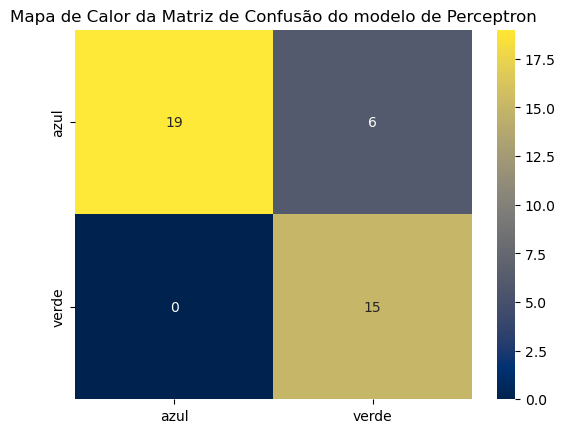

In [296]:
labels = ('azul','verde')
sns.heatmap(confusion_matrix(resultado,
                             predito),
                             xticklabels=labels,
                             yticklabels=labels,annot=True,
                             cmap='cividis',
                             )
title = "Mapa de Calor da Matriz de Confusão do modelo de Perceptron"
plt.title(title)
plt.savefig(f'imagens/{title}.png')

In [292]:
predito = np.argmax(MLP.predict(x_test),axis=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  


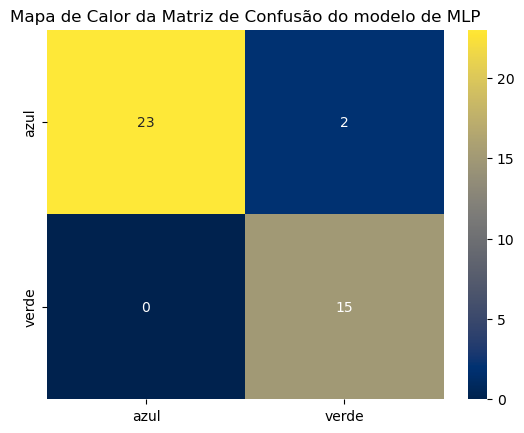

In [294]:
labels = ('azul','verde')
sns.heatmap(confusion_matrix(resultado,
                             predito),
                             xticklabels=labels,
                             yticklabels=labels,annot=True,
                             cmap='cividis',
                             )
title = "Mapa de Calor da Matriz de Confusão do modelo de MLP"
plt.title(title)
plt.savefig(f'imagens/{title}.png')